In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igc_tools
import igc_data
import math_utils
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
IGC_file = "igc_data/dunlap.IGC"
flight_log = igc_data.IGCLog(IGC_file)

In [3]:
flight_log.export_gpx("output.gpx")

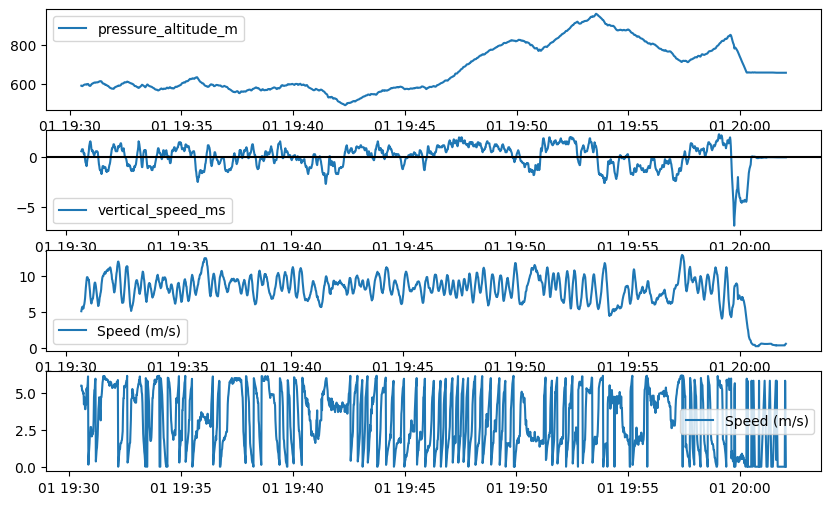

In [3]:
fig, axes = plt.subplots(4,1, figsize = [10, 6])
ax1, ax2, ax3, ax4 = axes
ax1.plot(flight_log.dataframe["time_pandas"],
           flight_log.dataframe["pressure_altitude_m"],
           label = "pressure_altitude_m")

ax2.plot(flight_log.dataframe["time_pandas"], 
         flight_log.dataframe["vertical_speed_ms"].rolling(window=10).mean(), label = "vertical_speed_ms")
ax2.axhline(color = "black")

ax3.plot(flight_log.dataframe["time_pandas"], 
         flight_log.dataframe["speed_ms"].rolling(window=10).mean(), label = "Speed (m/s)")

ax4.plot(flight_log.dataframe["time_pandas"], 
         flight_log.dataframe["direction_radians"], label = "Speed (m/s)")

for ax in axes:
    ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


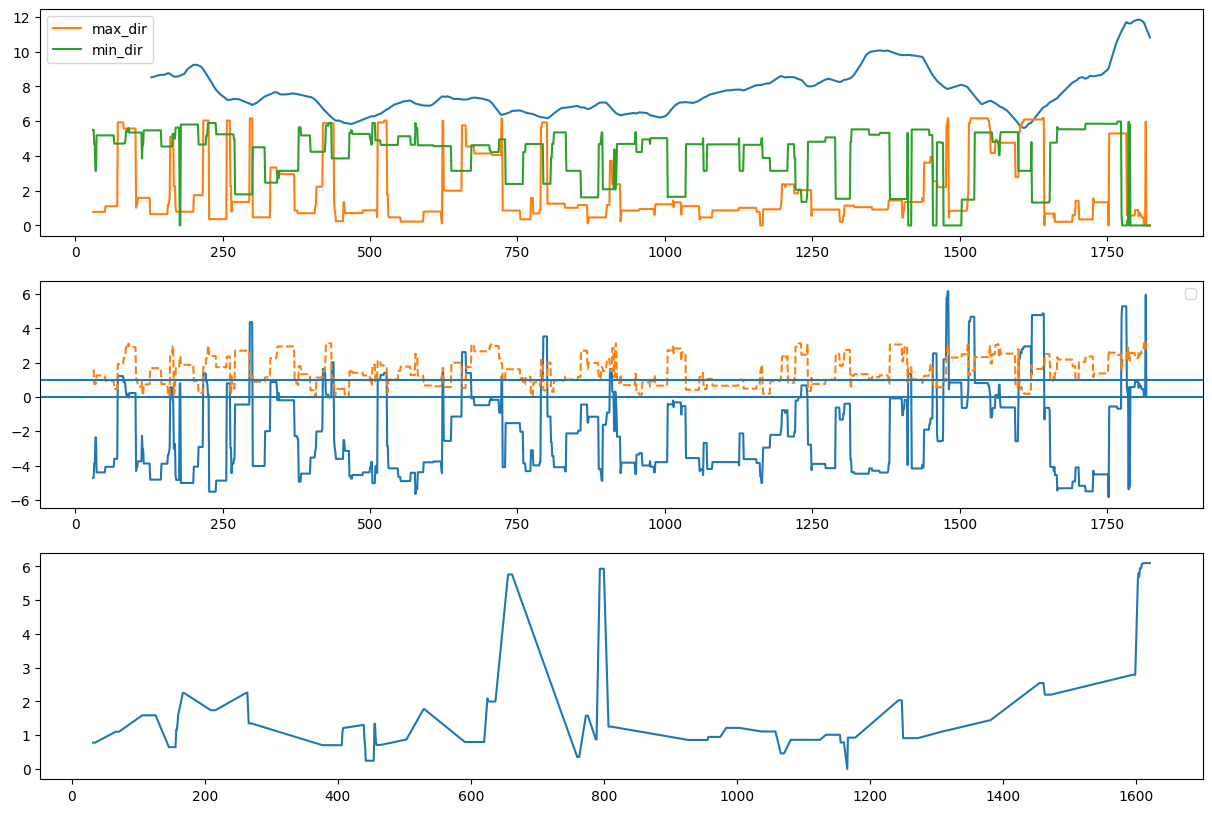

In [10]:

max_min = math_utils.build_apparent_wind(flight_log.dataframe)
fig, axes = plt.subplots(3, 1, figsize = [15, 10])

ax1, ax2, ax3 = axes

ax1.plot(max_min["vel"].rolling(100).mean())
ax1.plot(max_min["max_dir"], label = "max_dir")
ax1.plot(max_min["min_dir"], label = "min_dir")

ax1.legend()
ax2.plot(max_min["max_dir"] - max_min["min_dir"])
ax2.plot(max_min["seperation"], "--")
ax2.axhline(1)
ax2.axhline(0)

ax2.legend()

ax3.plot(max_min[max_min["filter"]]["max_dir"])


In [6]:
max_min = math_utils.build_apparent_wind(flight_log.dataframe)
fig, axes = plt.subplots(2, 1, figsize = [15, 10])

ax1, ax2 = axes

ax1.plot(max_min["vel"]
ax1.plot(max_min["max_dir"], label = "max_dir")
ax1.plot(max_min["min_dir"], label = "min_dir")

ax1.legend()
ax2.plot(max_min["max_dir"] - max_min["min_dir"])
ax2.plot(max_min["seperation"], "--")
ax2.legend()


SyntaxError: invalid syntax (1360769763.py, line 7)